In [1]:
import os, sys
sys.path.append(os.path.abspath("../src"))

import numpy as np
import qutip

import utils, visualization, simulation

In [2]:
# --- 1. Qumode system size & operators ---
N = 40 
a = qutip.destroy(N)    # annihilation operator
adag = a.dag()          # creation operator

# --- 2. Quadrature operators ---
x = (a + adag)/np.sqrt(2)   # position-like operator X
p = -1j*(a - adag)/np.sqrt(2) # momentum-like operator P

# --- 3. Potential parameters ---
D = 1.0     # dissociation energy scale
beta = 0.5  # potential parameter (width)
x0 = 0.5    # equilibrium displacement

# --- 4. Morse Hamiltonian ---
H = p**2 + D * (qutip.qeye(N) - (-beta*(x - x0*qutip.qeye(N))).expm())**2

# --- 5. Initial state ---
psi_init = qutip.coherent(N, 1)

# --- 6. Time evolution grid ---
times = np.linspace(0.0, 1.0, 50)

# --- 7. Manual time evolution ---
states = []
U_morse_opt = []

for n in range(0, len(times)):
    U_morse = (-1j * H * times[n]).expm()  # compute unitary U(t) = e^{-iHt}
    psi_current = U_morse * psi_init       # evolve the initial state
    states.append(psi_current)             # store state at time t
    U_morse_opt.append(U_morse)            # store unitary operator

result = {"states": states, "times": times}


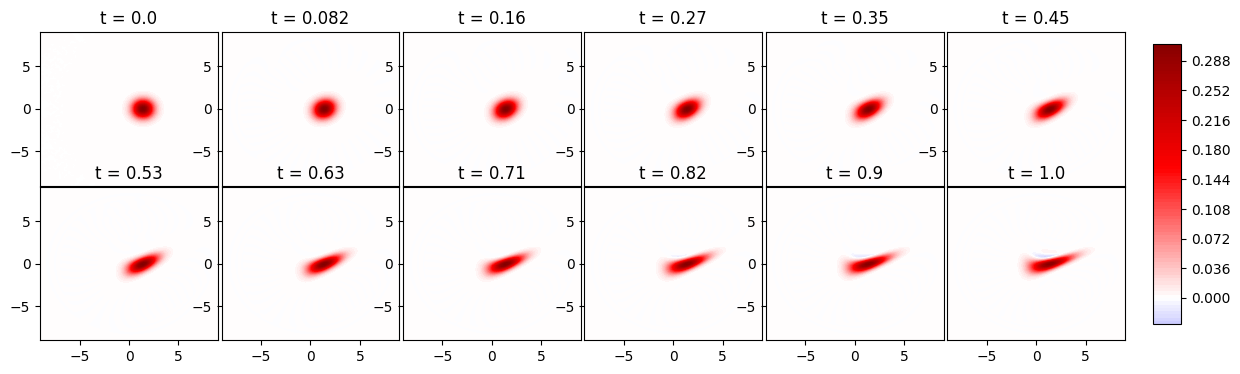

In [3]:
visualization.plot_wigner_fucntion(result, 0)

In [4]:
# Create Morse Potential Through My Code
morse_potential = utils.MorsePotential(
    de = 1.0, 
    b = 0.5, 
    x0 = 0.5
)

backend = utils.Gates(
    dim = 40,
    time = 1
)

morse_hamiltonian = backend.morse_hamiltonian(morse_potential)

full_morse = backend.full_morse_hamiltonian(morse_potential)


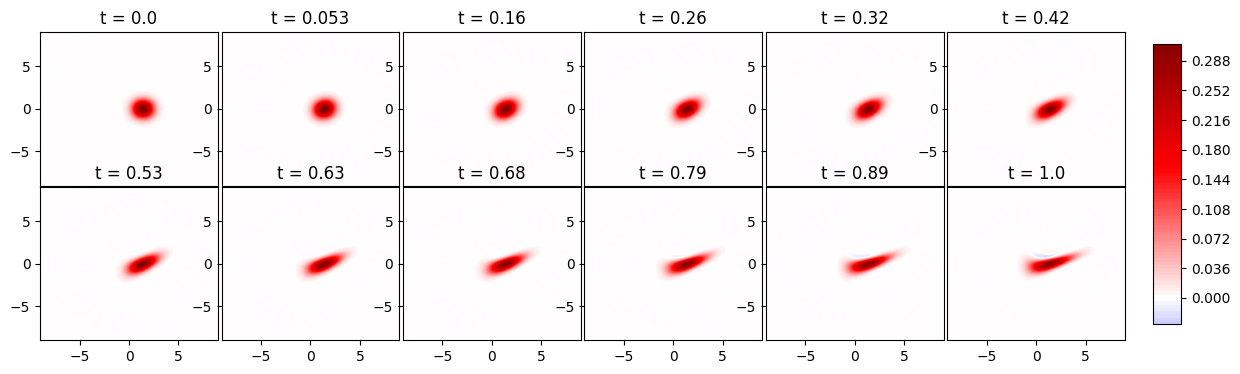

In [14]:
# create and plot based on my code

# --- 5. Initial state ---
psi_init2 = qutip.coherent(backend.dim, 1)

qub_init = qutip.basis(2, 0)        # |1> qubit state

full_init_state = qutip.tensor(qub_init, psi_init2)


# --- 6. Time evolution grid ---
times2 = np.linspace(0.0, 1.0, 20)

# --- 7. Manual time evolution ---
states2 = []
U_morse_opt2 = []

for n in range(0, len(times2)):
    #U_morse2 = qutip.Qobj(-1j * full_morse * times2[n]).expm()  # compute unitary U(t) = e^{-iHt}
    #psi_current2 = U_morse2 * psi_init2       # evolve the initial state
    full_morse = qutip.Qobj(full_morse, dims=[[2, backend.dim],[2, backend.dim]])
    U_morse2 = (-1j * full_morse * times2[n]).expm()

    psi_current2 = U_morse2 * full_init_state
    #psi_current2 = qutip.Qobj(visualization.extract_qumode_info(psi_current2.data, 0, backend.dim))


    #states2.append(psi_current2)             # store state at time t
    #U_morse_opt2.append(U_morse2)            # store unitary operator

    # Partial trace over qubit → get qumode density matrix
    
    rho_full = psi_current2 * psi_current2.dag()
    rho_qumode = qutip.ptrace(rho_full, [1])

    #states2.append(rho_qumode)
    states2.append(rho_full)

    U_morse_opt2.append(U_morse2)


result2 = {"states": states2, "times": times2}


visualization.plot_wigner_fucntion(result2, 1)



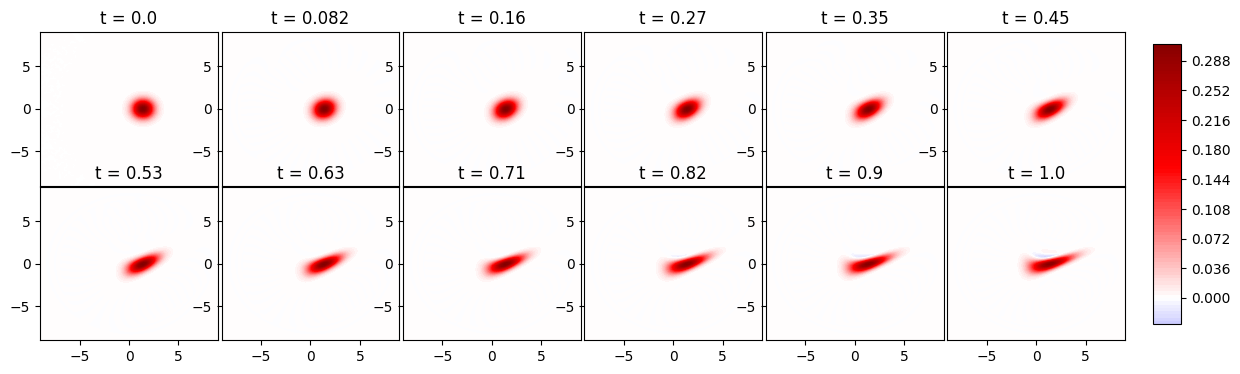

In [16]:
psi_init2 = qutip.coherent(backend.dim, 1)

qub_init = qutip.basis(2, 0)        # |1> qubit state

full_init_state = qutip.tensor(qub_init, psi_init2)

result3 = simulation.simulate(full_init_state, full_morse, 1.0, backend)

visualization.plot_wigner_fucntion(result3, 1)